In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import *
from xgboost import XGBClassifier
from sklearn.metrics import *
import lightgbm as lgb
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.utils import class_weight
from sklearn.ensemble import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import PowerTransformer


In [2]:
os.chdir("..")

In [3]:
pd.set_option('display.max_columns', None)

In [7]:
df=pd.read_csv('artifacts/data_transformation/train.csv')
df_1 = df.loc[:, ~df.columns.str.startswith('NATURE')]

In [8]:
df_1.head()

ACC_NO  MIN_DUE_AMT_1  MIN_DUE_AMT_2  MIN_DUE_AMT_3  MIN_DUE_AMT_4  \
0   93944.0         542.70           0.00           0.00           0.00   
1    7238.0        7798.39        4076.19        2045.47        1551.43   
2   11226.0           0.00           0.00           0.00           0.00   
3   94712.0         818.80         650.04         579.68         830.91   
4  119466.0         570.24         618.13         602.91         250.00   

   MIN_DUE_AMT_5  MIN_DUE_AMT_6  OVER_LIMIT_FEE_1  OVER_LIMIT_FEE_2  \
0           0.00           0.00               0.0               0.0   
1        7527.77         887.62               0.0               0.0   
2           0.00         250.00               0.0               0.0   
3         577.58         636.81               0.0               0.0   
4         250.00         250.00               0.0               0.0   

   OVER_LIMIT_FEE_3  OVER_LIMIT_FEE_4  OVER_LIMIT_FEE_5  OVER_LIMIT_FEE_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   TOT_SPEND_AMT_1  TOT_SPEND_AMT_2  TOT_SPEND_AMT_3  TOT_SPEND_AMT_4  \
0         12896.00         78185.72         16409.23          9008.00   
1         79873.03         67408.22        165612.27         87593.55   
2             0.00             0.00             0.00             0.00   
3             0.00             0.00          1739.70             0.00   
4             0.00         42779.00          8278.68         17041.09   

   TOT_SPEND_AMT_5  TOT_SPEND_AMT_6  PAYMENT_AMT_1  PAYMENT_AMT_2  \
0             0.00             0.00         3000.0            0.0   
1         42954.06        179232.44       195000.0        51500.0   
2             0.00             0.00            0.0            0.0   
3             0.00          6314.00        13000.0        20500.0   
4          2238.00             0.00        15000.0        15500.0   

   PAYMENT_AMT_3  PAYMENT_AMT_4  PAYMENT_AMT_5  PAYMENT_AMT_6  TOTAL_OS_1  \
0        42000.0         3000.0         1000.0         2000.0   137387.06   
1        52000.0        39000.0       188200.0        22500.0   140000.80   
2            0.0            0.0            0.0            0.0      -76.31   
3        16300.0        14500.0        20800.0        14500.0    97219.38   
4        16200.0         5500.0         3500.0         3500.0    97667.70   

   TOTAL_OS_2  TOTAL_OS_3  TOTAL_OS_4  TOTAL_OS_5  TOTAL_OS_6  LATE_PAY_FEE_1  \
0  125209.110    46277.59    65720.36    59712.36    60712.36          1750.0   
1  255127.770   232021.77   117428.98    68785.43   213981.38             0.0   
2     -76.310      -76.31      -76.31      -76.31      -76.31             0.0   
3  110219.375   130469.38   139029.67   153529.69   174329.67             0.0   
4  112667.700    85388.70    93310.02    81768.93    83030.93             0.0   

   LATE_PAY_FEE_2  LATE_PAY_FEE_3  LATE_PAY_FEE_4  LATE_PAY_FEE_5  \
0             0.0             0.0             0.0             0.0   
1             0.0          1750.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   LATE_PAY_FEE_6  A_SCORE_VALUE  FINAL_LIMIT  3_MONTH_NPL_STATUS   AGE  \
0             0.0          194.0     317000.0                 0.0  56.0   
1             0.0          217.0    1000000.0                 0.0  35.0   
2             0.0          231.0    1037000.0                 0.0  55.0   
3             0.0          233.0     500000.0                 0.0  37.0   
4          1750.0          201.0     376000.0                 0.0  56.

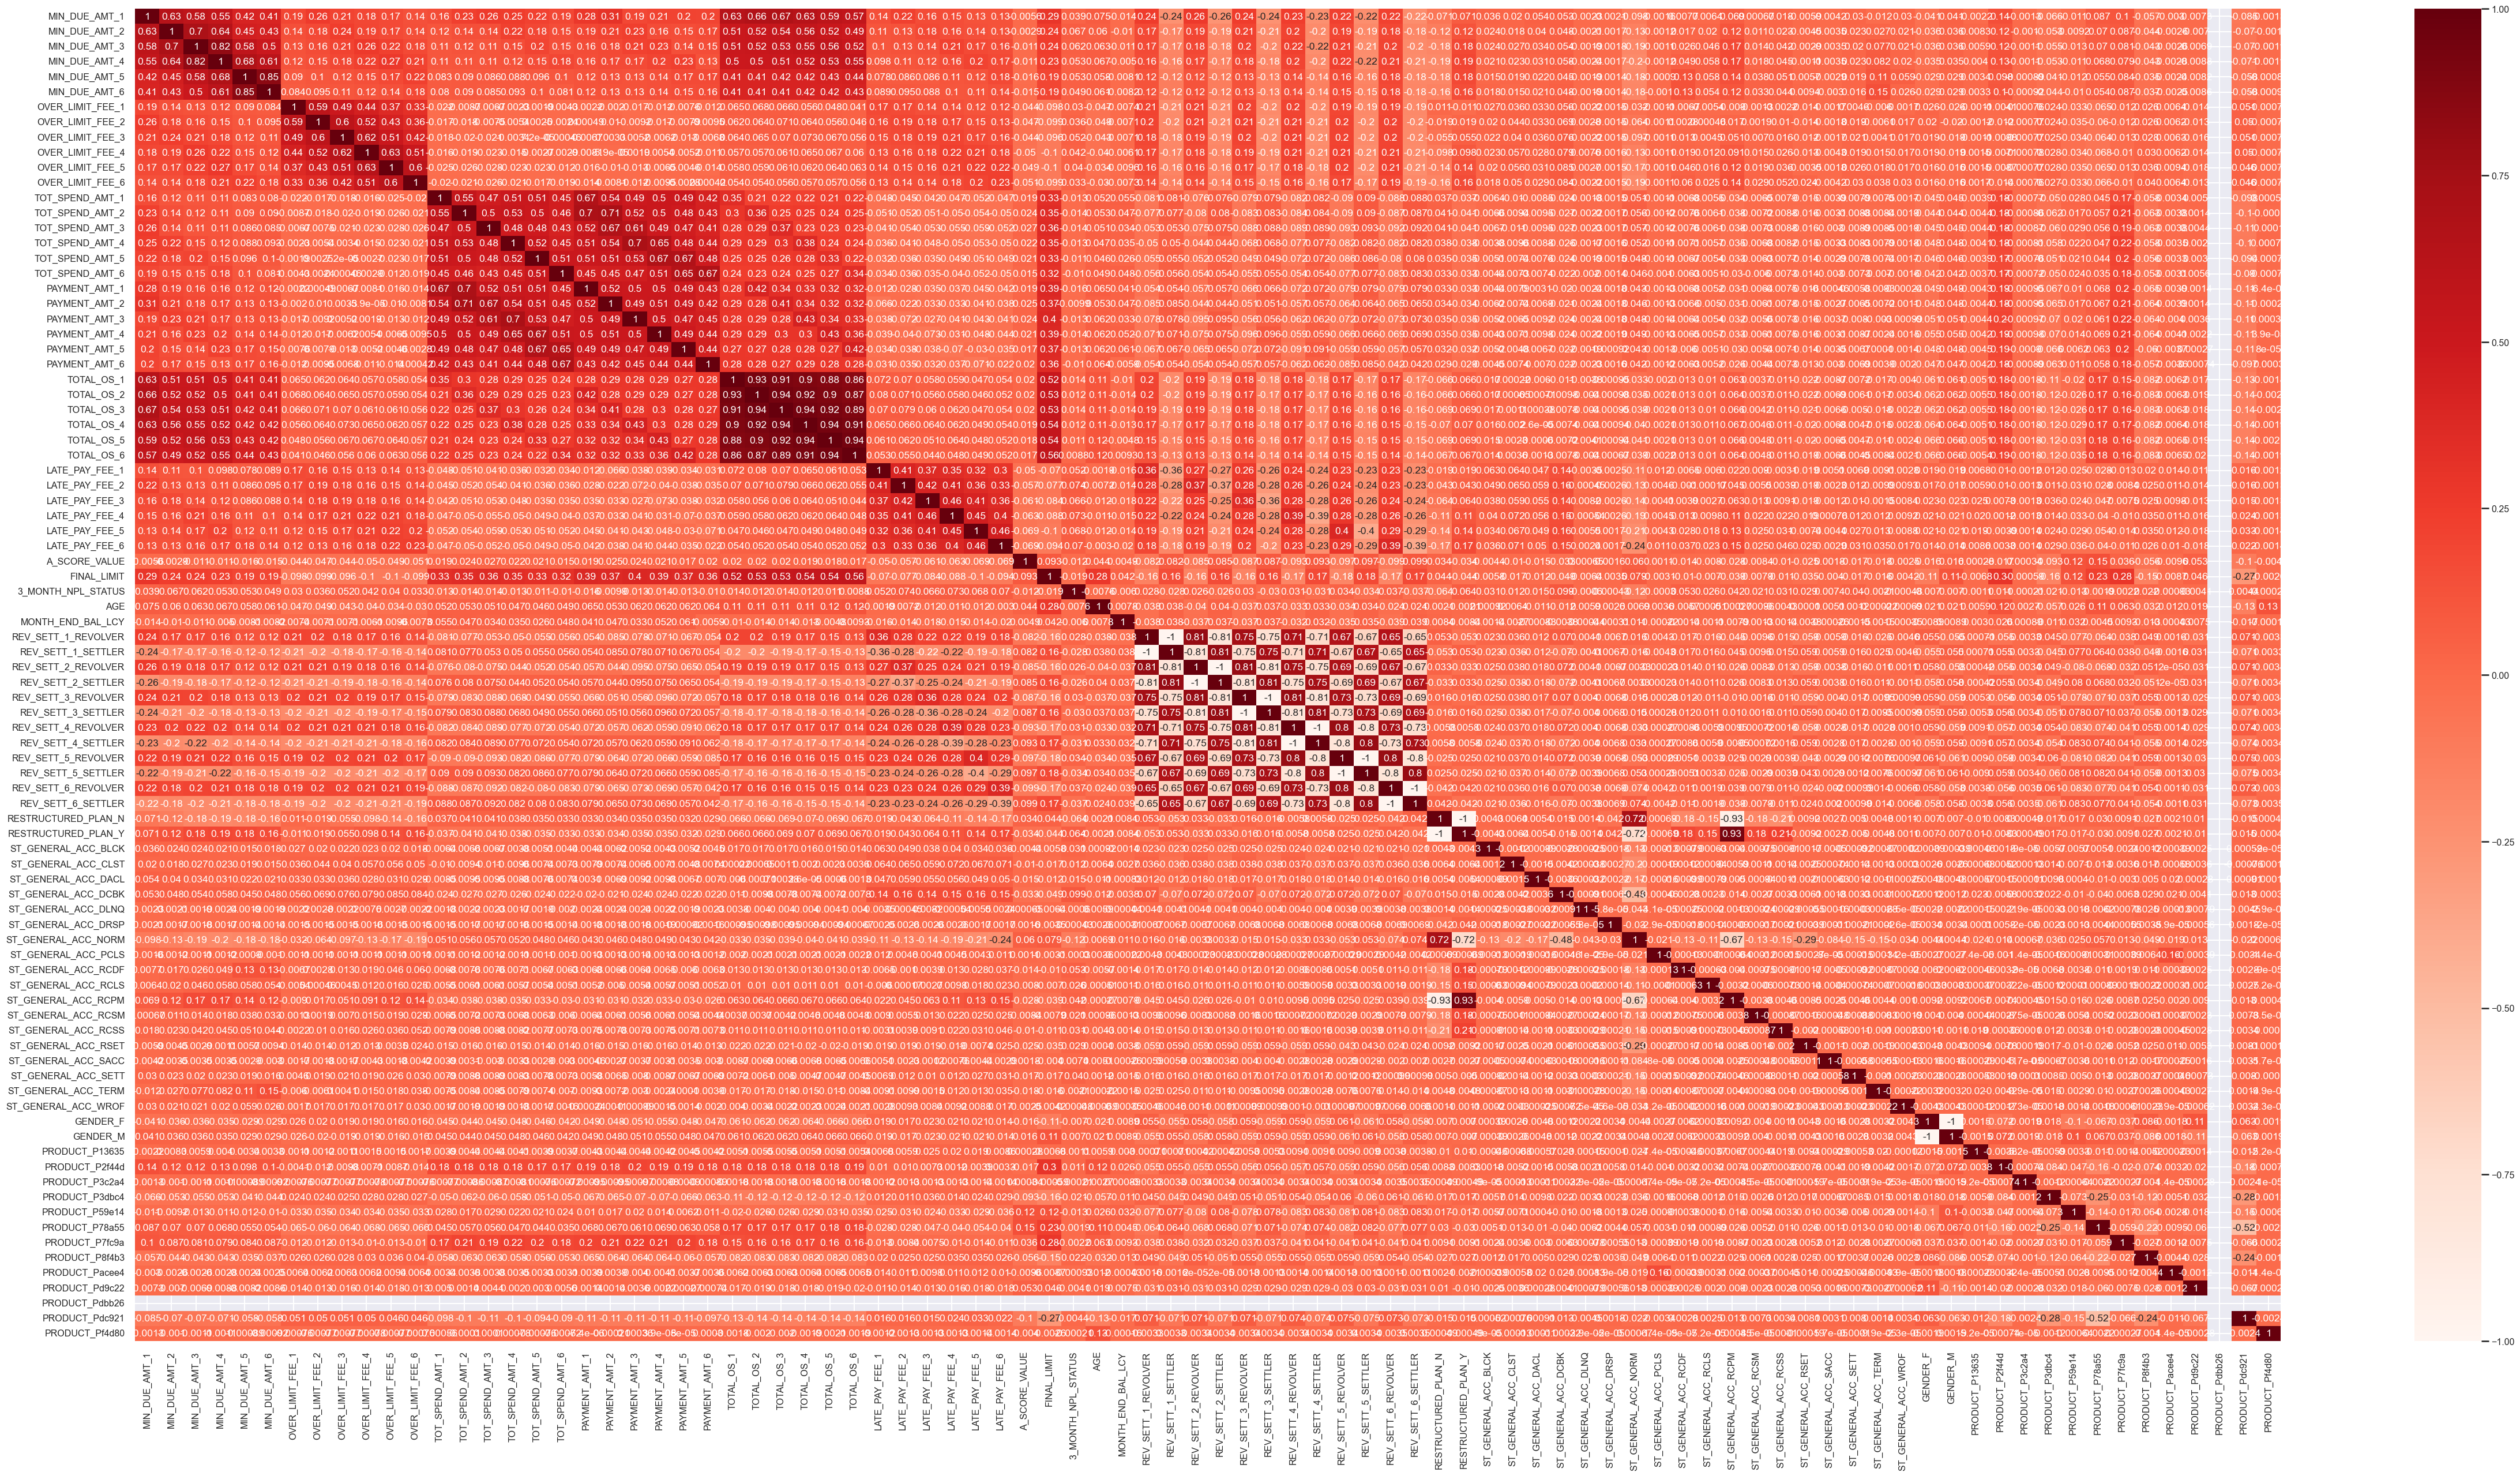

In [13]:
sns.set(rc={'figure.figsize':(60,30)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df_1.iloc[:,1:].corr(), cmap='Reds', annot=True);